In [1]:
import requests

In [2]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

## EXPLORATION DU FICHIER

In [3]:
path = "../data//txt/"
files = sorted(os.listdir(path))

In [4]:
len(files)

2820

### Statistique sur les fichiers

In [5]:
all_years = [str(year) for year in range(1847, 1979)]

In [6]:
count_decade = defaultdict(int)
count_cities = defaultdict(int)
count_tomes = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        city = elems[0]
        year = elems[1]
        tome = elems[3]
        covered_years.add(year)
        decade = year[:3] + "0s"
        count_decade[decade] += 1
        count_cities[city] += 1
        count_tomes[tome] += 1
    else:
        print(f"Anomalous file: {f}")

In [7]:
print(f"Il y a {count_cities['Bxl']} bulletins de Bruxelles and {count_cities['Lkn']} de Laeken")

Il y a 2669 bulletins de Bruxelles and 151 de Laeken


In [8]:
nb_rap = count_tomes['RptAn']
print(f"{len(files)-nb_rap-1} documents sont des bulletins et {nb_rap} documents sont des rapports annuels")

2637 documents sont des bulletins et 182 documents sont des rapports annuels


In [9]:
missing_years = [y for y in all_years if y not in covered_years]
print(f"Années manquantes: {', '.join(missing_years)}")

Années manquantes: 1853, 1875, 1916, 1917, 1940, 1941, 1942, 1943, 1944


### Nombre de bulletins par décénie

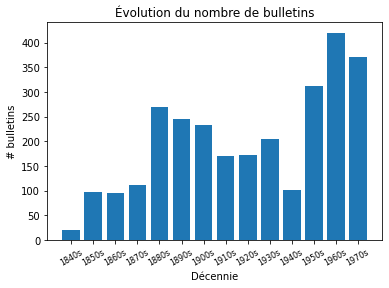

In [10]:
index = np.arange(len(count_decade))
plt.bar(index, count_decade.values())
plt.xlabel('Décennie')
plt.ylabel('# bulletins')
plt.xticks(index, count_decade.keys(), fontsize=8, rotation=30)
plt.title('Évolution du nombre de bulletins')
plt.show()

## NAUGE DE MOTS

In [11]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu""du", "un", "une", "en", "dans", "elle", "ils", "ait", "ainsi", "afin", "alors",
      "assez", "as", "aucun", "aurait", "d'abord", "deux", "dessous", "dessus", "dix", "dont",
      "encore", "est", "est-ce", "eurent", "eut", "faut", "hormis", "hors", "elles", "lesquels",
      "malgré", "moins", "mêmes", "notamment", "on", "parfois", "toutefois", "sommes", "voici",
      "étaient", "vos", "les", "zut", "état", "quand", "tellement", "pas", "grâce", "force", "peu", "celui", "etc"]
sw = set(sw)

In [13]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

227 stopwords:
 ['afin', 'ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'alors', 'après', 'as', 'assez', 'au', 'aucun', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'celui', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', "d'abord", 'dans', 'de', 'depuis', 'des', 'dessous', 'dessus', 'deux', 'dire', 'dit', 'dix', 'doit', 'donc', 'dont', 'du', 'elle', 'elles', 'en', 'encore', 'entre', 'es', 'est', 'est-ce', 'et', 'etc', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'force', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'grâce', 'het', 'hormis', 'hors', 'il', 

In [14]:
year = 0

In [15]:
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1850_Tome_I1_Part_1.txt',
 'Bxl_1850_Tome_I1_Part_2.txt',
 'Bxl_1850_Tome_I1_Part_3.txt',
 'Bxl_1850_Tome_I1_Part_4.txt',
 'Bxl_1850_Tome_II1_Part_1.txt',
 'Bxl_1850_Tome_II1_Part_2.txt',
 'Bxl_1850_Tome_II1_Part_3.txt',
 'Bxl_1850_Tome_II1_Part_4.txt',
 'Bxl_1850_Tome_II1_Part_5.txt',
 'Bxl_1850_Tome_II1_Part_6.txt',
 'Bxl_1850_Tome_II1_Part_7.txt',
 'Bxl_1860_Tome_I1_Part_1.txt',
 'Bxl_1860_Tome_I1_Part_2.txt',
 'Bxl_1860_Tome_I1_Part_3.txt',
 'Bxl_1860_Tome_I1_Part_4.txt',
 'Bxl_1860_Tome_II1_Part_1.txt',
 'Bxl_1860_Tome_II1_Part_2.txt',
 'Bxl_1860_Tome_II1_Part_3.txt',
 'Bxl_1860_Tome_II1_Part_4.txt',
 'Bxl_1860_Tome_II1_Part_5.txt',
 'Bxl_1860_Tome_II1_Part_6.txt',
 'Bxl_1870_Tome_I1_Part_1.txt',
 'Bxl_1870_Tome_I1_Part_2.txt',
 'Bxl_1870_Tome_I1_Part_3.txt',
 'Bxl_1870_Tome_I1_Part_4.txt',
 'Bxl_1870_Tome_I1_Part_5.txt',
 'Bxl_1870_Tome_I1_Part_6.txt',
 'Bxl_1870_Tome_II1_Part_1.txt',
 'Bxl_1870_Tome_II1_Part_2.txt',
 'Bxl_1870_Tome_II1_Part_3.txt',
 'Bxl_1870_Tome_II1_Part

In [16]:
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [17]:
len(content_list)

624

In [18]:
content_list[0][:1000]

"LLETIN COMMUNAL.\nANNÉE 1850.\n\nPREMIER\n\nSEMESTRE,\n\nBRUXELLES,\nOIS-WITTOI'CK\n\n,\n\nIMPlUMtVR\n\nDE\n\nLA\n\nVILLE,\n\n1U K\n\n\\V\n\nl\n\n\x0clïi\n\n\x0cVILLE\n\nDE\n\nBRUXELLES.\n\nBULLETIN COMMUNAL.\nANNÉE 1 8 5 0 . —\n\nN° 1.\n\nTravaux publics. — Adjudications.\n\nLe Collège des Bourgmestre et Echevins de la ville de Bruxelles\nProcédera, en séance publique, le mardi 5 février 1850, à une\nheure de relevée, à l'ouverture des soumissions qui l u i seront présentées pour l'entreprise des travaux et fournitures désignés c i dessous, savoir :\n4 Lot. — Travaux d'achèvement de la caserne du Petit-Château ;\n2 Lot. — Construction d'une rampe circulaire sur la place\ndes Panoramas ;\n3 Lot. — Confection du mobilier de l'école communale n° 6 ;\n4 Lot. — Construction de deux estacades au pont-canal dit des\nTrois-Trous;\n5\nLot. — Fourniture et pose de tablettes en pierre bleue aux\nQuais du Canal ;\n6 Lot. — Fourniture de tuyaux en fonte pour conduites deau ;\n7 Lot. — Confection 

In [19]:
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [20]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:2000]

"LLETIN COMMUNAL.\nANNÉE 1850.\n\nPREMIER\n\nSEMESTRE,\n\nBRUXELLES,\nOIS-WITTOI'CK\n\n,\n\nIMPlUMtVR\n\nDE\n\nLA\n\nVILLE,\n\n1U K\n\n\\V\n\nl\n\n\x0clïi\n\n\x0cVILLE\n\nDE\n\nBRUXELLES.\n\nBULLETIN COMMUNAL.\nANNÉE 1 8 5 0 . —\n\nN° 1.\n\nTravaux publics. — Adjudications.\n\nLe Collège des Bourgmestre et Echevins de la ville de Bruxelles\nProcédera, en séance publique, le mardi 5 février 1850, à une\nheure de relevée, à l'ouverture des soumissions qui l u i seront présentées pour l'entreprise des travaux et fournitures désignés c i dessous, savoir :\n4 Lot. — Travaux d'achèvement de la caserne du Petit-Château ;\n2 Lot. — Construction d'une rampe circulaire sur la place\ndes Panoramas ;\n3 Lot. — Confection du mobilier de l'école communale n° 6 ;\n4 Lot. — Construction de deux estacades au pont-canal dit des\nTrois-Trous;\n5\nLot. — Fourniture et pose de tablettes en pierre bleue aux\nQuais du Canal ;\n6 Lot. — Fourniture de tuyaux en fonte pour conduites deau ;\n7 Lot. — Confection 

In [21]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [22]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/0_clean.txt!'

In [23]:
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:2000]

'lletin communal année premier semestre bruxelles ois wittoi implumtvr lïi bruxelles bulletin communal année travaux publics adjudications collège bourgmestre echevins bruxelles procédera séance publique mardi février heure relevée ouverture soumissions présentées entreprise travaux fournitures désignés savoir lot travaux achèvement caserne petit château lot construction rampe circulaire place panoramas lot confection mobilier école communale lot construction estacades pont canal trous lot fourniture pose tablettes pierre bleue quais canal lot fourniture tuyaux fonte conduites deau lot confection pose bancs parc lot fourniture chaises casernes chacune entreprises adjugée seul lot soumissions cachetées porteront enveloppe indication objet reçues mardi février secrétariat hôtel prendre connaissance plans cahiers charges caliier charges devis lot achèvement caserne imprimés procurer exemplaires secrétariat hôtel janvier collège bourgmestre échevins collège secrétaire waefelaer droit débit

### Nuage de mots

In [28]:
frequencies = Counter(after.split())
print(frequencies.most_common(20))

[('francs', 49424), ('rue', 44421), ('conseil', 30193), ('collège', 26361), ('bruxelles', 25114), ('art', 22066), ('service', 21559), ('bourgmestre', 19937), ('travaux', 18600), ('budget', 17788), ('communal', 17776), ('frais', 17388), ('dépenses', 16181), ('publique', 14985), ('cours', 14500), ('recettes', 13990), ('compte', 13931), ('section', 13921), ('echevin', 13544), ('messieurs', 13174)]


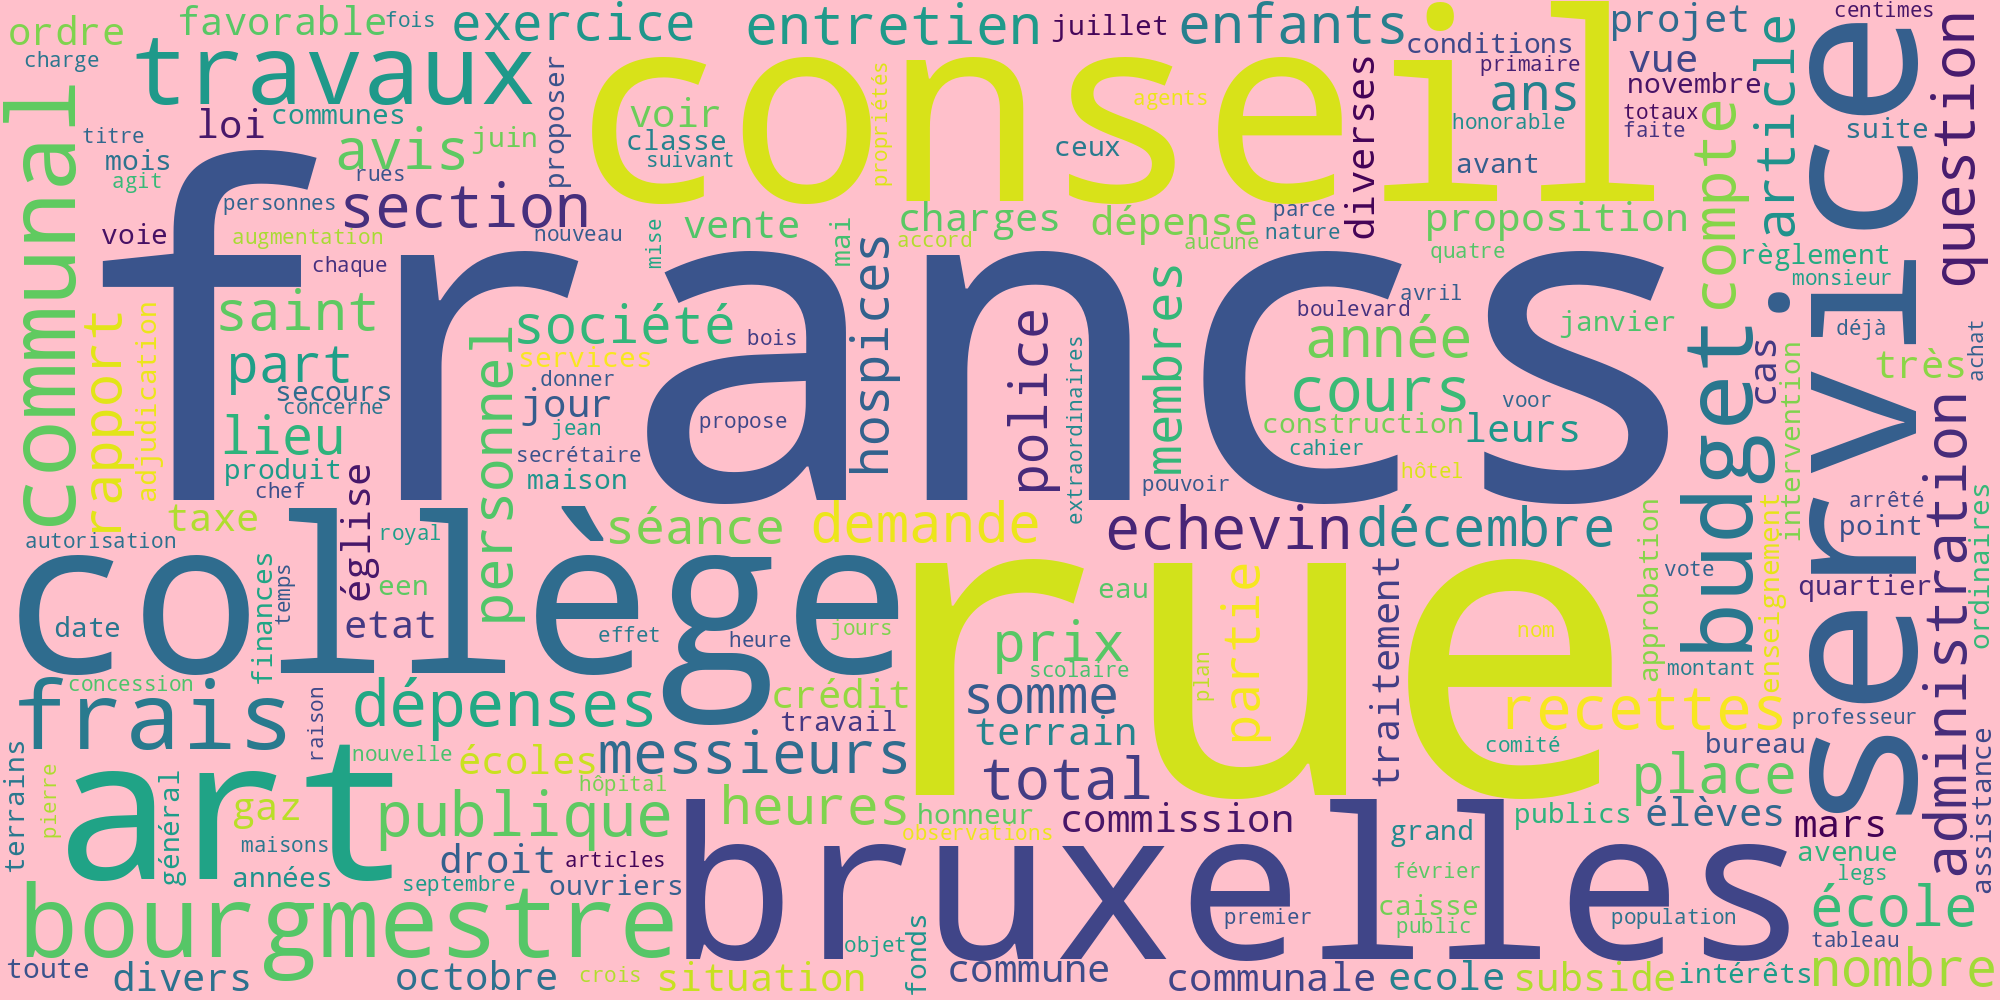

In [29]:
cloud = WordCloud(width=2000, height=1000, background_color='pink').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

## RECONNAISSANCE D'ENTITES NOMMEES AVEC SPACY

In [30]:
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

In [31]:
nlp = spacy.load('fr_core_news_md')

In [32]:
n=100000
text = open("../data/all.txt", encoding='utf-8').read()[:n]

In [33]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: user 6.36 s, sys: 133 ms, total: 6.49 s
Wall time: 6.5 s


In [34]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 50

In [35]:
sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:30]:
    print(f"{person} apparait {freq} fois dans le corpus")

q u i apparait 350 fois dans le corpus
Gendebien apparait 350 fois dans le corpus
Cluysenaar apparait 300 fois dans le corpus
Messieurs apparait 250 fois dans le corpus
Schuermans apparait 200 fois dans le corpus
Remblai apparait 200 fois dans le corpus
M. Ranwet apparait 200 fois dans le corpus
Verelst apparait 150 fois dans le corpus
Bourgmestre apparait 150 fois dans le corpus
Dedoncker apparait 150 fois dans le corpus
Doucet apparait 100 fois dans le corpus
M. Bortier apparait 100 fois dans le corpus
q u ' apparait 100 fois dans le corpus
baron de Ghendt apparait 100 fois dans le corpus
Robyns apparait 100 fois dans le corpus
baron de Ghendt de Lenglentier apparait 100 fois dans le corpus
D e P apparait 100 fois dans le corpus
Anspach apparait 100 fois dans le corpus
Verhulst apparait 100 fois dans le corpus
Fontainas apparait 100 fois dans le corpus
Doncker apparait 100 fois dans le corpus
Page apparait 100 fois dans le corpus
Médicamens apparait 100 fois dans le corpus
u r r i ap

## Sentiment analysis avec Textblob-FR

In [36]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

In [37]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

### Analyse du sentiment dans 10 phrases comportant le mot "Taxe"

In [38]:
get_sentiment("En deux mots, il fut décidé qu'on renoncerait à la taxe par voi ture, qu'on n'admettrait pas le droit de stationnement proposé par M. Vaucamps.")

This text is 14% positive and 0.25% subjective.


In [39]:
get_sentiment("Modification au tarif des taxes communales.")

This text is neutral and perfectly objective.


In [40]:
get_sentiment("La disposition en vigueur paraît d'autant plus injuste qu'elle a pour conséquenc e d'assujettir un contribuable au payement d'une double taxe, lorsqu'il quitte la commune au commencement de l'année , pour aller s'établir dans une autre localité .  ")

This text is 21% negative and 0.3033333333333333% subjective.


In [41]:
get_sentiment("Il serait difficile d'appliquer la taxe telle qu'elle l'était autrefois.")

This text is 50% negative and 0.4% subjective.


In [42]:
get_sentiment("Cette taxe est évidemment insuffisante, vu l'augmentation des matériaux et de la main-d'œuvr e depuis quatre ans qu'elle a été établie, et nous devons vous proposer, Messieurs, de la majorer comme suit.")

This text is 20% positive and 0.4% subjective.


In [43]:
get_sentiment("Cette taxe ne sera applicable que dans le cas où le propriétaire ne voudrait pas s'entendre avec la commune pour les travaux d'utilité publique.")

This text is 4% positive and 0.05% subjective.


In [44]:
get_sentiment("Nous avons l'honneur de vous demander l'approbation définitive des rôles de la taxe sur Us chiens et de la taxe sur le débit en détail de boissons alcooliques. ")

This text is neutral and perfectly objective.


In [45]:
get_sentiment("Enfin, le Conseil statue sur des réclamations relatives à l'application de la taxe sur le revenu cadastral en 1885.")

This text is neutral and 0.15% subjective.


In [46]:
get_sentiment("M. le Bourgmestre. — Je vous ferai remarquer que le pavage de la rue de Molenbeek n'est pas encore payé et que si vous voulez aujourd'hui un pavage en pavés neufs, vous nous obligerez à faire payer la taxe aux riverains. Je ne pense pas que ce soit là leur désir")

This text is 10% positive and 0.44999999999999996% subjective.


In [47]:
get_sentiment("Nous vous demandons aussi d'approuver provisoirement le rôle C de la taxe sur les établissements dangereux. ")

This text is 55% negative and 0.6% subjective.


## CLASSIFICATION DES DOCUMENTS

In [48]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import seaborn as sn
from pprint import pprint
import numpy as np

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix
import pandas as pd
import re
import operator
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Déterminer le nombre d'articles et de catégories

In [49]:
news = fetch_20newsgroups(subset='all')

In [50]:
print("Number of articles: " + str(len(news.data)))

Number of articles: 18846


In [51]:
print("Number of categories: " + str(len(news.target_names)))

Number of categories: 20


In [52]:
labels = news.target_names
print(labels)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


## LE MODELE WORD2VEC

In [53]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

In [54]:
model = Word2Vec.load("../data/bulletins.model")

### Afficher les mots les plus proches du terme "Taxe communale"

In [55]:
model.wv.most_similar("taxe", topn=20)

[('base', 0.8864657282829285),
 ('reduction', 0.8040028810501099),
 ('reserve', 0.7877477407455444),
 ('colonne', 0.7869418263435364),
 ('mesure', 0.7737370729446411),
 ('suppression', 0.7703023552894592),
 ('legislature', 0.7609761357307434),
 ('constitution', 0.7591462135314941),
 ('matiere', 0.7572412490844727),
 ('premiere_fois', 0.7556735873222351),
 ('responsabilite', 0.7536165118217468),
 ('limite', 0.7514782547950745),
 ('perte', 0.7456198334693909),
 ('petition', 0.7447428703308105),
 ('realisation', 0.7441925406455994),
 ('portee', 0.7348005175590515),
 ('verite', 0.7315400242805481),
 ('combinaison', 0.7310647368431091),
 ('reunion', 0.7210015654563904),
 ('pose', 0.7207593321800232)]

In [56]:
print(model.wv.most_similar(positive=['commune', 'taxe'], negative=['bruxelles']))

[('base', 0.782530665397644), ('reduction', 0.7646288871765137), ('realisation', 0.7638735175132751), ('constitution', 0.758582592010498), ('matiere', 0.752945601940155), ('suppression', 0.7479353547096252), ('necessite', 0.7429100275039673), ('destination', 0.7407728433609009), ('responsabilite', 0.7398767471313477), ('faculte', 0.7326933145523071)]


## Détection de la langue dans les documents

In [57]:
import os
from collections import defaultdict

import langid
import pycountry

In [58]:
langid.set_languages(['fr', 'nl', 'en', 'de'])

In [59]:
root = "../data/txt/"
txts = os.listdir(root)
print(f"{len(txts)} TXT files found")

2820 TXT files found


In [60]:
decade= all_years
limit = 2000

In [61]:
lang_dict = defaultdict(int)
txts = txts[:limit] if limit else texts

In [62]:
for i, txt in enumerate(sorted(txts)):
    if txt.endswith("txt"):
        if i % 50 == 0:
            print(f'{i} document(s) processed...')
        text = open(os.path.join(root, txt)).read()
        text_length = len(text)
        if text_length > 20:
            lang, conf = langid.classify(text)
            lang_dict[lang] += 1
        else:
            print(f"{txt} contains only {text_length} characters, treating as unknown")
            lang_dict['n/a'] += 1
print("Done")

0 document(s) processed...
50 document(s) processed...
100 document(s) processed...
150 document(s) processed...
200 document(s) processed...
Bxl_1869_Tome_I1_Part_4.txt contains only 4 characters, treating as unknown
250 document(s) processed...
300 document(s) processed...
350 document(s) processed...
400 document(s) processed...
450 document(s) processed...
500 document(s) processed...
550 document(s) processed...
600 document(s) processed...
650 document(s) processed...
700 document(s) processed...
750 document(s) processed...
Bxl_1903_Tome_I2_2_Part_12.txt contains only 19 characters, treating as unknown
800 document(s) processed...
850 document(s) processed...
900 document(s) processed...
950 document(s) processed...
1000 document(s) processed...
1050 document(s) processed...
1100 document(s) processed...
1150 document(s) processed...
Bxl_1925_Tome_II1_2_Part_8.txt contains only 9 characters, treating as unknown
1200 document(s) processed...
1250 document(s) processed...
Bxl_1929

In [63]:
for lang_code, nb_docs in lang_dict.items():
    language = pycountry.languages.get(alpha_2=lang_code)
    try:
        lang_name = language.name
    except AttributeError:
        lang_name = language
    print(f"{lang_name}\t{nb_docs}")

French	1990
None	9
Dutch	1


## FREQUENCE DES MOTS

In [64]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

227 stopwords:
 ['afin', 'ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'alors', 'après', 'as', 'assez', 'au', 'aucun', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'celui', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', "d'abord", 'dans', 'de', 'depuis', 'des', 'dessous', 'dessus', 'deux', 'dire', 'dit', 'dix', 'doit', 'donc', 'dont', 'du', 'elle', 'elles', 'en', 'encore', 'entre', 'es', 'est', 'est-ce', 'et', 'etc', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'force', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'grâce', 'het', 'hormis', 'hors', 'il', 

In [66]:
# Récupération du contenu du fichier
path = "../data/all.txt"
limit = 10**8

with open(path) as f:
    text = f.read()[:limit]

In [67]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

4622909 words found


In [68]:
words[:20]

['V',
 'I',
 'L',
 'L',
 'E',
 'DE',
 'BRUXELLES',
 'bulletin',
 'ires',
 '8éanas',
 'Dl',
 '!',
 'CONSEIL',
 'COMMUNAL',
 'ANNÉE',
 '1847',
 '.',
 'AU',
 'VILLE',
 'DE']

In [69]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

958325 words kept (57874 different word forms)


In [70]:
fdist = nltk.FreqDist(kept)
fdist.most_common(50)

[('conseil', 7231),
 ('rue', 6636),
 ('section', 5537),
 ('collège', 4768),
 ('francs', 4442),
 ('bruxelles', 3911),
 ('travaux', 3337),
 ('administration', 3266),
 ('rapport', 2995),
 ('art', 2817),
 ('hospices', 2812),
 ('bourgmestre', 2753),
 ('place', 2748),
 ('projet', 2625),
 ('séance', 2470),
 ('mètres', 2252),
 ('partie', 2185),
 ('frais', 2137),
 ('police', 2066),
 ('messieurs', 2063),
 ('dépenses', 2061),
 ('marché', 2033),
 ('proposition', 2015),
 ('service', 2007),
 ('lieu', 1964),
 ('nombre', 1953),
 ('année', 1931),
 ('demande', 1922),
 ('finances', 1884),
 ('somme', 1741),
 ('heures', 1727),
 ('enfants', 1697),
 ('ceux', 1675),
 ('prix', 1657),
 ('publics', 1641),
 ('eau', 1628),
 ('question', 1618),
 ('budget', 1591),
 ('compte', 1577),
 ('hôtel', 1576),
 ('mois', 1575),
 ('droit', 1563),
 ('communal', 1553),
 ('général', 1520),
 ('leurs', 1515),
 ('toute', 1498),
 ('publique', 1478),
 ('dépense', 1459),
 ('exécution', 1407),
 ('cas', 1385)]

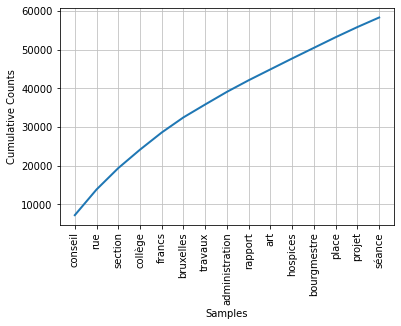

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [71]:
# Plot: les n mots les plus fréquents
n = 15
fdist.plot(n, cumulative=True)